## Import necessary libs

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [8]:

# Define the file path
file_path = "../../data/raw/02_Used_Car_Prices.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows
df


,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,475000.0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,400000.0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,290000.0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,265000.0


Basic EDA

In [4]:
df.isnull().sum()


Brand_Model           0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price (INR Lakhs)     0
dtype: int64

In [5]:
df.describe()


,Year,Kilometers_Driven,Seats,Price (INR Lakhs)
count,6019.000000,6.019000e+03,5977.000000,6.019000e+03
mean,2013.358199,5.873838e+04,5.278735,9.479468e+05
std,3.269742,9.126884e+04,0.808840,1.118792e+06
min,1998.000000,1.710000e+02,0.000000,4.400000e+04
25%,2011.000000,3.400000e+04,5.000000,3.500000e+05
50%,2014.000000,5.300000e+04,5.000000,5.640000e+05
75%,2016.000000,7.300000e+04,5.000000,9.950000e+05
max,2019.000000,6.500000e+06,10.000000,1.600000e+07


In [6]:
df.dtypes


Brand_Model           object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price (INR Lakhs)    float64
dtype: object

In [7]:
df.duplicated().sum()


0

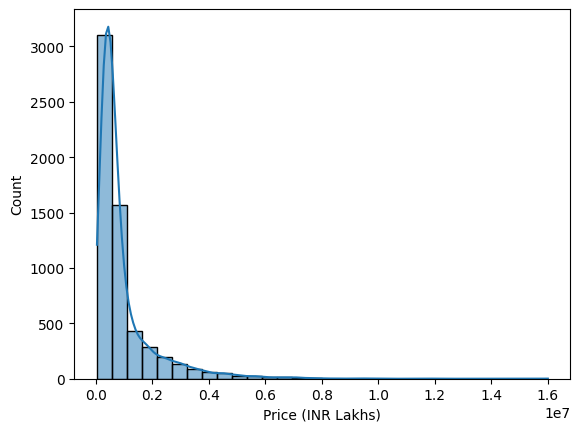

In [10]:
sns.histplot(df['Price (INR Lakhs)'], bins=30, kde=True)
plt.show()

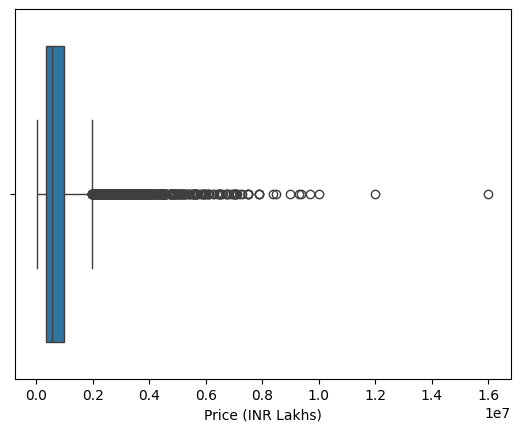

In [11]:
sns.boxplot(x=df['Price (INR Lakhs)'])
plt.show()

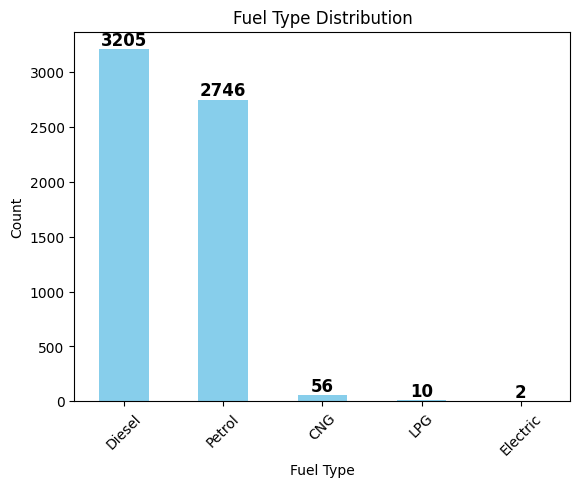

In [13]:
# Plot the bar chart
ax = df['Fuel_Type'].value_counts().plot(kind='bar', color='skyblue')

# Add text above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Year', ylabel='Price (INR Lakhs)'>

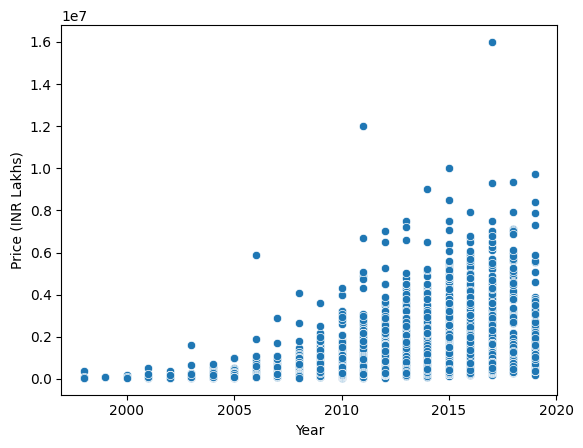

In [14]:
sns.scatterplot(x=df['Year'], y=df['Price (INR Lakhs)'])


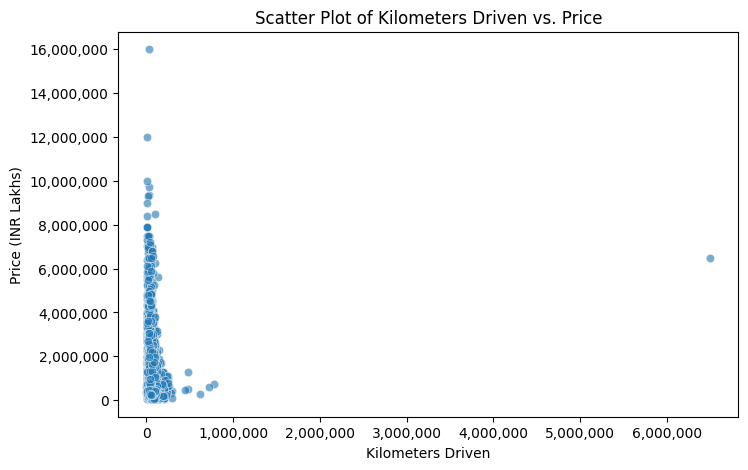

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create scatter plot
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df['Kilometers_Driven'], y=df['Price (INR Lakhs)'], alpha=0.6)

# Format x-axis and y-axis to show normal numbers
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Adds commas instead of scientific notation
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Formats y-axis the same way

# Labels and title
plt.xlabel("Kilometers Driven")
plt.ylabel("Price (INR Lakhs)")
plt.title("Scatter Plot of Kilometers Driven vs. Price")

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_29080\1835998595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df['Fuel_Type'], y=df['Price (INR Lakhs)'], palette='Set2')


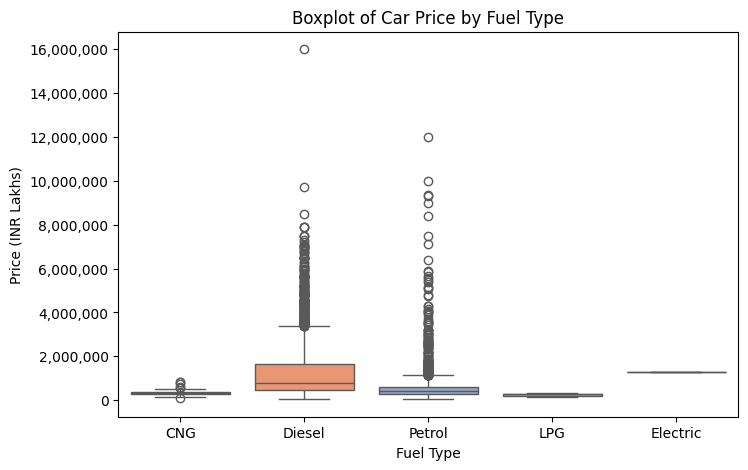

In [22]:

# Create boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=df['Fuel_Type'], y=df['Price (INR Lakhs)'], palette='Set2')

# Format the y-axis to show normal numbers
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Formats y-axis without scientific notation

# Labels and title
plt.xlabel("Fuel Type")
plt.ylabel("Price (INR Lakhs)")
plt.title("Boxplot of Car Price by Fuel Type")

plt.show()

Manual data cleaning

In [28]:
# Drop all rows with any null values
df = df.dropna().copy()

# Verify the result
print(df.isnull().sum())

Brand_Model          0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price (INR Lakhs)    0
dtype: int64


There is a "null bhp" we need to take node of here

In [34]:
df['Power'].unique()


array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [35]:
# Check and filter rows where 'Power' is 'null bhp'
df = df[df['Power'] != 'null bhp']


In [36]:

df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '').astype(float)

df['Power'] = df['Power'].astype(str).str.replace('bhp', '').astype(float)



C:\Users\User\AppData\Local\Temp\ipykernel_29080\2632458453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_29080\2632458453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'] = df['Power'].astype(str).str.replace('bhp', '').astype(float)


In [37]:
df['Mileage'] = df['Mileage'].str.extract(r'([\d\.]+)').astype(float)


C:\Users\User\AppData\Local\Temp\ipykernel_29080\3246856516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].str.extract(r'([\d\.]+)').astype(float)


Engine and power have high multicolinearity. Hence one col will be dropped


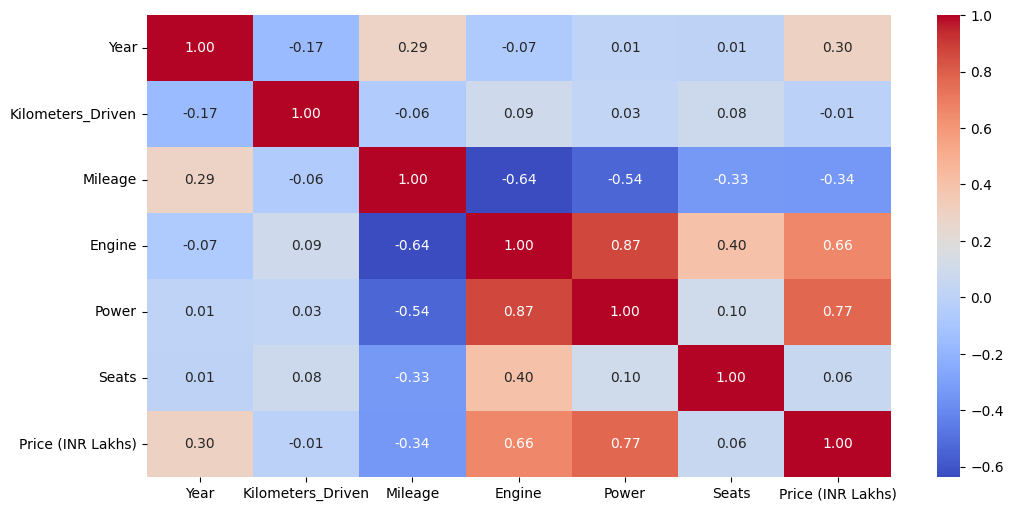

In [38]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns only
corr = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [39]:
from pycaret.regression import *  # For regression tasks (adjust if you're working with classification)

# Initialize setup
exp1 = setup(df, target='Price (INR Lakhs)', session_id=123)


,Description,Value
0,Session id,123
1,Target,Price (INR Lakhs)
2,Target type,Regression
3,Original data shape,"(5872, 12)"
4,Transformed data shape,"(5872, 28)"
5,Transformed train set shape,"(4110, 28)"
6,Transformed test set shape,"(1762, 28)"
7,Numeric features,6
8,Categorical features,5
9,Preprocess,True


In [ ]:
df_summary = get_data()  # Retrieves the summary of the dataset


NameError: name 'get_data' is not defined

In [ ]:
# Correlation matrix
plot_model(exp1, plot='correlation')

# Distribution of the target variable
plot_model(exp1, plot='distribution')

# Feature Importance Plot
plot_model(exp1, plot='feature')

# Pair plot
plot_model(exp1, plot='pair')


In [ ]:
plot_model(exp1, plot='box')  # Boxplot of features vs. target


In [ ]:
plot_model(exp1, plot='outliers')  # Outlier detection plot
